Tutorial from [Neural-Networks-from-Scratch by lionelmessi6410]https://github.com/lionelmessi6410/Neural-Networks-from-Scratch

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
!pip install imageio
from cs231n.data_utils import load_CIFAR10


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


# Helper functions

In [2]:
def show_images(images, labels, samples_per_class = 7):   
    # Visualize some examples from the dataset.
    # We show a few examples of training images from each class.
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(labels == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(images[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show() 
    
def one_hot(x, k, dtype = np.float32):
    """Create a one-hot encoding of x of size k."""
    x_one_hot = np.zeros((x.size, k))
    x_one_hot[np.arange(x.size), x] = 1
    return x_one_hot
    #return np.array(x[:, None] == np.arange(k), dtype)    

# Acquire Data

In [3]:
# default mnist
'''
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features and labels
x = mnist.data.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target.astype('int')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = 10
y_train_one_hot = np.zeros((y_train.size, num_classes))
y_train_one_hot[np.arange(y_train.size), y_train] = 1

y_test_one_hot = np.zeros((y_test.size, num_classes))
y_test_one_hot[np.arange(y_test.size), y_test] = 1

# Print shapes to verify
print(f"x_train shape: {X_train.shape}")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
'''
print('mnist data not load')

mnist data not load


In [4]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print(f"data type{type(X_train)}")
X_train.shape, y_train.shape, X_test.shape, y_test.shape

data type<class 'numpy.ndarray'>


((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

Training data: (50000, 32, 32, 3) (50000,)
Test data: (10000, 32, 32, 3) (10000,)


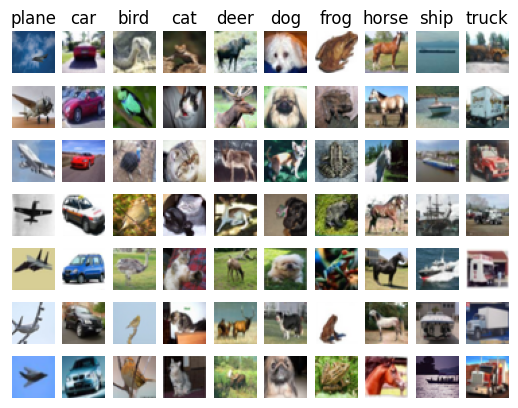

In [5]:
print("Training data: {} {}".format(X_train.shape, y_train.shape))
print("Test data: {} {}".format(X_test.shape, y_test.shape))
show_images(X_train,y_train)

## One-hot encode labels

In [6]:
# Normalize ### for color images DONOT normalize
#X_train = X_train/255
#X_test = X_test/255
'''
num_labels = 10
example = y_train.shape[0]
y_train_en = one_hot(y_train.astype('int32'),num_labels)
y_train_en[-20:]
'''

# One-hot encode labels
num_labels = 10
y_train_en = one_hot(y_train,num_labels)
y_test_en = one_hot(y_test,num_labels)
print(f"type{type(y_train_en)}, shape:{y_train_en.shape}")

type<class 'numpy.ndarray'>, shape:(50000, 10)


In [7]:
y_train = y_train_en
y_test = y_test_en
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

## Subsample the data

In [8]:
# Subsample the data for more efficient code execution in this exercise
FAST_TRAIN = True
if FAST_TRAIN:
    num_training = 5000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    
    num_test = 500
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

## Reshape image

In [9]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


# !! Normalization !!

Normalizing data is a crucial step in training neural networks, as it helps to stabilize and speed up the training process.

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Implementing a Neural Network

## Perceptron

In [11]:
import math # import math module

class Perceptron:
    def __init__(self):
        ''' Perceptron initialization '''
        self.w = [0.1, 0.5] # Weights
        self.theta = -0.8 # Bias
        self.eta = 0.2 # Learning Rate
        
    def response(self, x):
        """ Perceptron output """
        # Calculate weighted sum
        y = x[0] * self.w[0] + x[1] * self.w[1] + self.eta
        # If weighted sum > 0, return 1. Otherwise return 0
        if y > 0:
            return 1
        else:
            return 0
    
    def update_weights(self, x, iter_error):
        """ Weights update """
        self.w[0] += self.eta * iter_error* x[0]
        self.w[1] += self.eta * iter_error* x[1]
        
    def update_bias(self, iter_error):
        """ Bias update """
        self.theta += self.eta * iter_error
        
    def train(self, data):
        """ Training """
        learned = True # Should perform training
        round = 0 # Initialize round to 0
        while learned:
            total_error = 0.0
            for x in data:
                r = self.response(x)
                if x[2] != r:
                    round_error = x[2] - r
                    self.update_weights(x, round_error)
                    self.update_bias(round_error)
                    total_error +=abs(round_error)
            round += 1
            
            if math.isclose(total_error, 0) or round >= 100:
                print("Total number of rounds (epochs): ", round)
                print("Final weights: ", self.w)
                print("Final bias: ",self.theta)
                learned = False

In [12]:
""" Main function """
perceptron = Perceptron()
trainset = [[0,0,0], [0,1,0], [1,0,0], [1,1,1]] # AND Gate Truth Table ???
perceptron.train(trainset)

Total number of rounds (epochs):  100
Final weights:  [-0.10000000000000003, 0.3]
Final bias:  -41.00000000000004


## MultiLayerPerceptron

In [13]:
class MultiLayerPerceptron:
    def __init__(self):
        """ Multi-layer perceptron initialization """
        self.wij = np.array([       # weights between input and hidden layer
            [-0.65, 0.64],          # w1, w2
            [1.11, 0.84]            # w3, w4
        ])
        self.wjk = np.array([       # weights between hidden and output layer
            [0.86],
            [-1.38]
        ])
        self.tj = np.array([
            [0.0],                  # theta 1
            [0.0]                   # theta 2
        ])
        self.tk = np.array([[0.0]]) # theta 3, bias of node in the ouput layer
        self.eta = 0.5              # learning rate
        self.max_round = 10000      # number of rounds
        
    def sigmoid(self, z, sig_cal=False):
        """ sigmoid function and the calculation of z * (1 - z) """
        if sig_cal: return 1/(1 + np.exp(-z)) # if sig_cal is True, return simoid . i.e. ForwardPropagation -> find loss
        return z * (1 - z) # if sig_cal is False, return z * (1 - z). i.e. BackPropagation -> update weights
    
    def forward(self, x, predict = False):
        sample = x.reshape(len(x), 1)
        yj = self.sigmoid(self.wij.dot(sample) + self.tj, sig_cal = True)
        yk = self.sigmoid(self.wjk.transpose().dot(yj) + self.tk, sig_cal = True)
        if predict: return yk
        return (sample, yj, yk)
    
    def backpropagation(self, values, tk):
        Oi = values[0] # input sample
        Oj = values[1] # hidden node outputs
        Ok = values[2] # predicted output
        
        """ back propagation """
        delta_k = np.multiply((Ok - tk), self.sigmoid(Ok))
        delta_j = np.multiply(self.sigmoid(Oj), delta_k[0][0] * self.wjk)
        self.wjk -= self.eta * delta_k[0][0] * Oj
        s = self.eta * delta_j.dot(Oi.T)
        self.wij -= s
        self.tj -= self.eta * delta_j
        self.tk -= self.eta * delta_k
        
    def train(self, X, T):
        """ Train """
        for i in range(self.max_round):
            for j in range(m):
                print(f'Iternation: {i+1} and {j+1}')
                values = self.forward(X[j])             # Forward propagation
                self.backpropagation(values, T[j])       # Back propagation
                
    def print(self):
        print(f'wij: {self.wij}')
        print(f'wjk: {self.wjk}')
        print(f'tj: {self.tj}')
        print(f'tk: {self.tk}')

m = 4 # Number of training samples

In [14]:
# XOR Gate Truth Table  
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 0]
])

T = np.array([
    [0],
    [1],
    [1],
    [0]
])

mlp = MultiLayerPerceptron()
mlp.train(X, T)
mlp.print()
for k in range(m):
    Ok = mlp.forward(X[k], True)
    print(f"f{k}: {Ok}")

Iternation: 1 and 1
Iternation: 1 and 2
Iternation: 1 and 3
Iternation: 1 and 4
Iternation: 2 and 1
Iternation: 2 and 2
Iternation: 2 and 3
Iternation: 2 and 4
Iternation: 3 and 1
Iternation: 3 and 2
Iternation: 3 and 3
Iternation: 3 and 4
Iternation: 4 and 1
Iternation: 4 and 2
Iternation: 4 and 3
Iternation: 4 and 4
Iternation: 5 and 1
Iternation: 5 and 2
Iternation: 5 and 3
Iternation: 5 and 4
Iternation: 6 and 1
Iternation: 6 and 2
Iternation: 6 and 3
Iternation: 6 and 4
Iternation: 7 and 1
Iternation: 7 and 2
Iternation: 7 and 3
Iternation: 7 and 4
Iternation: 8 and 1
Iternation: 8 and 2
Iternation: 8 and 3
Iternation: 8 and 4
Iternation: 9 and 1
Iternation: 9 and 2
Iternation: 9 and 3
Iternation: 9 and 4
Iternation: 10 and 1
Iternation: 10 and 2
Iternation: 10 and 3
Iternation: 10 and 4
Iternation: 11 and 1
Iternation: 11 and 2
Iternation: 11 and 3
Iternation: 11 and 4
Iternation: 12 and 1
Iternation: 12 and 2
Iternation: 12 and 3
Iternation: 12 and 4
Iternation: 13 and 1
Iternat

# 3-layer neural network

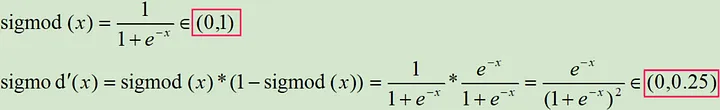

In [15]:
class DeepNeuralNetwork():
    def __init__(self, sizes, activation = 'sigmoid'):
        self.sizes = sizes
        
        # Choose activation function
        if activation == 'relu':
            self.activation = self.relu
        elif activation == 'sigmoid':
            self.activation = self.sigmoid
        else:
            raise ValueError("Activation function is currently not support, please use 'relu' or 'sigmoid' instead.")

        # save all weights 
        self.params = self.initialize()
        # Save all intermediate values, i.e. activations        
        self.cache = {}

    def relu(self, x, derivative = False):
        '''
            Derivative of ReLU is a bit more complicated since it is not differentiable at x = 0
        
            Forward path:
            relu(x) = max(0, x)
            In other word,
            relu(x) = 0, if x < 0
                    = x, if x >= 0
        
            Backward path:
            ∇relu(x) = 0, if x < 0
                     = 1, if x >=0
        '''
        if derivative:
            x = np.where(x < 0, 0, x)
            x = np.where(x >= 0, 1, x)
            return x
        return np.maximum(0, x)

    def sigmoid(self, x, derivative = False):
        '''
            Forward path:
            σ(x) = 1 / 1+exp(-z)
            
            Backward path:
            ∇σ(x) = exp(-z) / (1+exp(-z))^2
        '''
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    def softmax(self, x):
        '''
            softmax(x) = exp(x) / ∑exp(x)
        '''
        # Numerically stable with large exponentials
        '''
        in order to improve training stability, 
        deep neural networks typically use a numerically stable softmax,
        which subtracts the max of the vector on which softmax is being performed
        in order to ensure that the result does not blow up to infinity.
        '''
        exps = np.exp(x - x.max()) 
        return exps / np.sum(exps, axis=0)

    def initialize(self):
        # number of nodes in each layer
        input_layer = self.sizes[0]
        hidden_layer = self.sizes[1]
        output_layer = self.sizes[2]

        params = {
            "W1": np.random.randn(hidden_layer, input_layer) * np.sqrt(1. / input_layer), # why??? "* np.sqrt(1. / input_layer)" why??
            #"W1": np.random.randn(hidden_layer, input_layer) * np.sqrt(2. / input_layer), # He initialization
            "b1": np.zeros((hidden_layer, 1)) * np.sqrt(1./input_layer), # Answer: Weight Initialization - Xavier initialization
            "W2": np.random.randn(output_layer, hidden_layer) * np.sqrt(1. / hidden_layer), 
            #"W2": np.random.randn(output_layer, hidden_layer) * np.sqrt(2. / hidden_layer), ## He initialization
            "b2": np.zeros((output_layer, 1)) * np.sqrt(1./hidden_layer)
        }
        return params

    def initialize_momentum_optimizer(self):
        momentum_opt = {
            "W1": np.zeros(self.params["W1"].shape),
            "b1": np.zeros(self.params["b1"].shape),
            "W2": np.zeros(self.params["W2"].shape),
            "b2": np.zeros(self.params["b2"].shape)
        }
        return momentum_opt

    def feed_forward(self, x):
        '''
            y = σ(wX + b)
        '''
        self.cache["X"] = x
        self.cache["Z1"] = np.matmul(self.params['W1'], self.cache['X'].T) + self.params['b1']
        self.cache["A1"] = self.activation(self.cache["Z1"])
        self.cache["Z2"] = np.matmul(self.params['W2'], self.cache["A1"]) + self.params['b2']
        self.cache["A2"] = self.softmax(self.cache['Z2'])
        return self.cache['A2']

    def back_propagate(self, y, output):
        '''
            This is the backpropagation algorithm, for calculating the updates
            of the neural network's parameters.

            Note: There is a stability issue that causes warnings. This is 
                  caused  by the dot and multiply operations on the huge arrays.
                  
                  RuntimeWarning: invalid value encountered in true_divide
                  RuntimeWarning: overflow encountered in exp
                  RuntimeWarning: overflow encountered in square
        '''
        current_batch_size = y.shape[0]
        dZ2 = output - y.T
        dW2 = (1./current_batch_size) * np.matmul(dZ2, self.cache["A1"].T)
        db2 = (1./current_batch_size) * np.sum(dZ2, axis = 1, keepdims = True)

        dA1 = np.matmul(self.params["W2"].T, dZ2)
        dZ1 = dA1 * self.activation(self.cache["Z1"], derivative = True)
        dW1 = (1./current_batch_size) * np.matmul(dZ1, self.cache["X"])
        db1 = (1./current_batch_size) * np.sum(dZ1, axis = 1, keepdims = True)

        self.grads = {"W1": dW1, "b1":db1, "W2":dW2, "b2":db2}
        return self.grads

    def cross_entropy_loss(self, y, output):
        '''
            L(y, ŷ) = −∑ylog(ŷ).
        '''
        l_sum = np.sum(np.multiply(y.T, np.log(output + 1e-9)))  # "1e-9" Add small values to logits to avoid log(0)
        m = y.shape[0]
        l = -(1./m) * l_sum
    
        return l

    def optimize(self, l_rate=0.1, beta=.9):
        '''
            Stochatic Gradient Descent (SGD):
            θ^(t+1) <- θ^t - η∇L(y, ŷ)
            
            Momentum:
            v^(t+1) <- βv^t + (1-β)∇L(y, ŷ)^t
            θ^(t+1) <- θ^t - ηv^(t+1)
        '''
        if self.optimizer == "sgd":
            for key in self.params:
                self.params[key] = self.params[key] - l_rate * self.grads[key]
        elif self.optimizer == "momentum":
            for key in self.params:
                self.momentum_opt[key] = (beta * self.momentum_opt[key] + (1. - beta) * self.grads[key])
                self.params[key] = self.params[key] - l_rate * self.momentum_opt[key]
        else:
            raise ValueError("Optimizer is currently not support, please use 'sgd' or 'momentum' instead.")

    def accuracy(self, y, output):
        return np.mean(np.argmax(y, axis=-1) == np.argmax(output.T, axis = -1))

    def train(self, x_train, y_train, x_test, y_test, epochs=10, 
              batch_size=64, optimizer='momentum', l_rate=0.1, beta=.9):
        # Hyperparameters
        self.epochs = epochs
        self.batch_size = batch_size
        num_batches = -(-x_train.shape[0] // self.batch_size)

        # Initialize optimizer
        self.optimizer = optimizer
        if self.optimizer == 'momentum':
            self.momentum_opt = self.initialize_momentum_optimizer()

        start_time = time.time()
        template = "Epoch {}: {:.2f}s,train acc={:.2f}, train loss={:.2f}, test acc={:.2f}, test loss={:.2f}"

        # Train
        for i in range(self.epochs):
            # Shuffle
            permutation = np.random.permutation(x_train.shape[0])
            x_train_shuffled = x_train[permutation]
            y_train_shuffled = y_train[permutation]

            for j in range(num_batches):
                # Batch
                begin = j * self.batch_size
                end = min(begin + self.batch_size, x_train.shape[0] - 1)
                x = x_train_shuffled[begin:end]
                y = y_train_shuffled[begin:end]

                # Forward Propagation
                output = self.feed_forward(x)
                # Back propagation
                grad = self.back_propagate(y, output)
                # Optimize
                self.optimize(l_rate=l_rate, beta=beta)

            # Evaluate performance
            # Training data
            output = self.feed_forward(x_train)
            train_acc = self.accuracy(y_train, output)
            train_loss = self.cross_entropy_loss(y_train, output)
            # Test data
            output = self.feed_forward(x_test)
            test_acc = self.accuracy(y_test, output)
            test_loss = self.cross_entropy_loss(y_test, output)        
            print(template.format(i+1, time.time()-start_time,train_acc, train_loss, test_acc, test_loss))

In [16]:
'''
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, num_classes = 10)
#y_test = to_categorical(y_test, num_classes = 10)

# Convert labels to one-hot encoding
num_classes = 10
y_train_one_hot = np.zeros((y_train.size, num_classes))
y_train_one_hot[np.arange(y_train.size), y_train] = 1

y_test_one_hot = np.zeros((y_test.size, num_classes))
y_test_one_hot[np.arange(y_test.size), y_test] = 1

y_train = y_train_one_hot
y_test = y_test_one_hot

X_train.shape, y_train.shape, X_test.shape, y_test.shape
'''
print("skip")

skip


In [17]:
# Sigmoid + Momentum # val acc = 34%
dnn = DeepNeuralNetwork(sizes = [X_train.shape[1], 64, num_labels], activation='sigmoid')
#dnn.train(X_train, y_train, X_test, y_test, batch_size=128, optimizer='momentum', l_rate=4, beta=.9)
dnn.train(X_train, y_train, X_test, y_test, batch_size=128, optimizer='momentum', l_rate=0.01, beta=.9, epochs=100)

Epoch 1: 0.28s,train acc=0.10, train loss=2.29, test acc=0.09, test loss=2.29
Epoch 2: 0.57s,train acc=0.16, train loss=2.27, test acc=0.14, test loss=2.27
Epoch 3: 0.82s,train acc=0.22, train loss=2.26, test acc=0.20, test loss=2.26
Epoch 4: 1.02s,train acc=0.20, train loss=2.24, test acc=0.21, test loss=2.24
Epoch 5: 1.24s,train acc=0.23, train loss=2.22, test acc=0.24, test loss=2.22
Epoch 6: 1.46s,train acc=0.26, train loss=2.21, test acc=0.26, test loss=2.21
Epoch 7: 1.66s,train acc=0.27, train loss=2.20, test acc=0.26, test loss=2.20
Epoch 8: 1.87s,train acc=0.28, train loss=2.18, test acc=0.26, test loss=2.19
Epoch 9: 2.07s,train acc=0.28, train loss=2.17, test acc=0.27, test loss=2.18
Epoch 10: 2.28s,train acc=0.28, train loss=2.16, test acc=0.27, test loss=2.17
Epoch 11: 2.45s,train acc=0.28, train loss=2.15, test acc=0.27, test loss=2.16
Epoch 12: 2.67s,train acc=0.28, train loss=2.14, test acc=0.28, test loss=2.15
Epoch 13: 2.86s,train acc=0.29, train loss=2.13, test acc=0.2

In [18]:
# ReLU + SGD # val acc = 25%
dnn = DeepNeuralNetwork(sizes=[X_train.shape[1], 64, num_labels], activation='relu')
#dnn.train(X_train, y_train, X_test, y_test, batch_size=128, optimizer='sgd', l_rate=0.05)
dnn.train(X_train, y_train, X_test, y_test, batch_size=128, optimizer='sgd', l_rate=0.01, epochs=100)

Epoch 1: 0.46s,train acc=0.19, train loss=2.26, test acc=0.18, test loss=2.28
Epoch 2: 0.65s,train acc=0.23, train loss=2.15, test acc=0.22, test loss=2.16
Epoch 3: 0.83s,train acc=0.17, train loss=2.15, test acc=0.14, test loss=2.19
Epoch 4: 0.99s,train acc=0.21, train loss=2.17, test acc=0.21, test loss=2.21
Epoch 5: 1.18s,train acc=0.20, train loss=2.13, test acc=0.17, test loss=2.16
Epoch 6: 1.37s,train acc=0.24, train loss=2.06, test acc=0.22, test loss=2.10
Epoch 7: 1.59s,train acc=0.27, train loss=2.00, test acc=0.21, test loss=2.06
Epoch 8: 1.83s,train acc=0.27, train loss=2.05, test acc=0.25, test loss=2.13
Epoch 9: 2.03s,train acc=0.28, train loss=2.02, test acc=0.28, test loss=2.08
Epoch 10: 2.27s,train acc=0.29, train loss=1.93, test acc=0.26, test loss=1.98
Epoch 11: 2.44s,train acc=0.25, train loss=2.03, test acc=0.21, test loss=2.09
Epoch 12: 2.62s,train acc=0.24, train loss=2.05, test acc=0.21, test loss=2.13
Epoch 13: 2.83s,train acc=0.30, train loss=1.97, test acc=0.2

# Comparison w/ keras library

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD,Adam

In [52]:
model = Sequential()

model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')) #repeated
model.add(Dense(units = num_labels, kernel_initializer = 'uniform', activation = 'softmax'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
sgd = SGD(learning_rate = 0.01)
adam = Adam(learning_rate = 0.001)

model.compile(optimizer = sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train, y_train, epochs = 100, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1410 - loss: 2.2839 - val_accuracy: 0.2300 - val_loss: 2.0966
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2264 - loss: 2.0826 - val_accuracy: 0.2340 - val_loss: 2.0179
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2790 - loss: 1.9799 - val_accuracy: 0.3080 - val_loss: 1.9523
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3017 - loss: 1.9428 - val_accuracy: 0.3180 - val_loss: 1.9487
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3109 - loss: 1.9099 - val_accuracy: 0.3000 - val_loss: 1.9696
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3260 - loss: 1.9008 - val_accuracy: 0.3320 - val_loss: 1.8854
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3186 - loss: 1.8717 - val_accuracy: 0.3100 - val_loss: 1.8867
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3490 - loss: 1.8294 - val_accuracy: 0.

# Recap

1. Rememember do Normalization ==> avoid "loss" in 'NaN' value as the ground true value aka the pixel value is range [0,255] while the predicts is range [0,1] which led to log(0) and then return 'NaN'